### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : ethereum_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/ethereum_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,297.57,318.57,268.29,312.99,"1,551,050,000","28,100,000,000"
1,2017-09-04,347.13,347.13,279.94,295.17,"1,801,690,000","32,774,000,000"
2,2017-09-03,350.23,366.49,332.23,347.48,"986,266,000","33,059,800,000"
3,2017-09-02,387.82,389.35,328.10,348.98,"1,483,600,000","36,601,200,000"
4,2017-09-01,383.47,390.04,383.47,387.74,"874,222,000","36,182,900,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 761 entries, 2017-09-05 to 2015-08-07
Data columns (total 6 columns):
Open          761 non-null float64
High          761 non-null float64
Low           761 non-null float64
Close         761 non-null float64
Volume        761 non-null object
Market Cap    761 non-null object
dtypes: float64(4), object(2)
memory usage: 41.6+ KB


- The data frame has 761 entries and 6 columns. 
- All columns has 761 elements, probably there's no missing data. Especially for Open, high, Low, and Close. To make it sure, We'll see for this
- Volume and Market Cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    1
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume and Market Cap recognize as a string, not a number.
- There are missing data (1 Data)

Solution:
- Convert to float number
- Using Fillna or interpolation Method

In [7]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [8]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 761 entries, 2017-09-05 to 2015-08-07
Data columns (total 6 columns):
Open          761 non-null float64
High          761 non-null float64
Low           761 non-null float64
Close         761 non-null float64
Volume        761 non-null int64
Market Cap    760 non-null float64
dtypes: float64(5), int64(1)
memory usage: 61.6 KB


In [9]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,761.000000,761.000000,761.000000,761.000000,7.610000e+02,7.600000e+02
mean,49.895319,52.372998,47.483389,50.287726,1.776451e+08,4.585061e+09
std,94.701419,99.021937,90.028103,95.157500,4.208592e+08,8.865419e+09
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05,3.197360e+07
25%,4.360000,4.770000,4.030000,4.400000,5.173420e+06,3.378095e+08
50%,11.110000,11.340000,10.750000,11.080000,1.397150e+07,9.277390e+08
75%,17.360000,18.880000,16.370000,17.600000,5.558060e+07,1.488940e+09
max,397.590000,414.760000,383.470000,401.490000,2.882650e+09,3.676160e+10


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [10]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['Market Cap'])]
new_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2015-08-12,1.060000,1.290000,0.883608,1.220000,2150620,64018400.0
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,42796500.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,43130000.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,42637600.0
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,167911000.0


In [11]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.998075,0.997907,0.997072,0.859102,0.999940
High,0.998075,1.000000,0.996976,0.998884,0.876612,0.997921
Low,0.997907,0.996976,1.000000,0.998014,0.844720,0.997927
Close,0.997072,0.998884,0.998014,1.000000,0.867734,0.996970
Volume,0.859102,0.876612,0.844720,0.867734,1.000000,0.858942
Market Cap,0.999940,0.997921,0.997927,0.996970,0.858942,1.000000


In the data frame above, we can inferred that Market Cap has a strong relationship (Linear) with Open.

In [12]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = new_df[['Open']]
Market_Cap  = new_df['Market Cap']

In [13]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# Model Score
model.score(Open, Market_Cap)

0.9998804439116196

In [15]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
open = df1[['Open']]
market_cap_predict = model.predict(open) 
df1['Market Cap Predict'] = market_cap_predict.astype('int64')
df1[df1['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
Date,,,,,,,
2015-08-07,2.83,3.54,2.52,2.77,164329,NaN,175721023


#### 4. Data Visualization

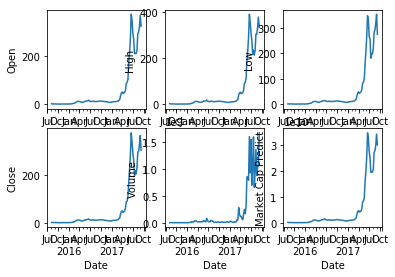

In [16]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1.Volume.resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df1['Market Cap Predict'].resample('W').mean().plot()